<a href="https://colab.research.google.com/github/4057TyLee/DL-Assignment/blob/main/DL_Assignment_2_(Image_Classification_with_CNN)_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

np.set_printoptions(suppress=True)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
print("There are ", len(x_train), "images in the training dataset")     
print("There are ", len(x_test), "images in the test dataset")   

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
x_train[9].shape

(28, 28)

In [6]:
x_train[9]

# I see the pixel values:

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0, 164,  50,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,
          0,   1,   1,   0,   0,   5,   0,  45, 217, 255, 176,   0,   6,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   3,
          3,   5,   9,   0,   2,   0,  62, 236, 231, 215,  27,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  29, 244, 231, 234,  74,   0,   1,   0,
          0,   0],
       [  

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [7]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

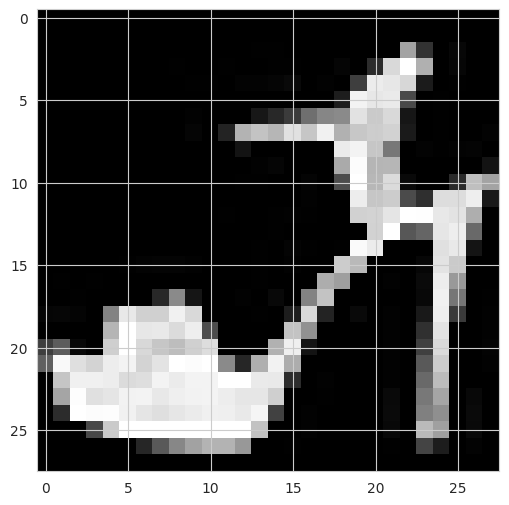

In [8]:
plt.imshow(x_train[9],cmap='gray')

<Axes: >

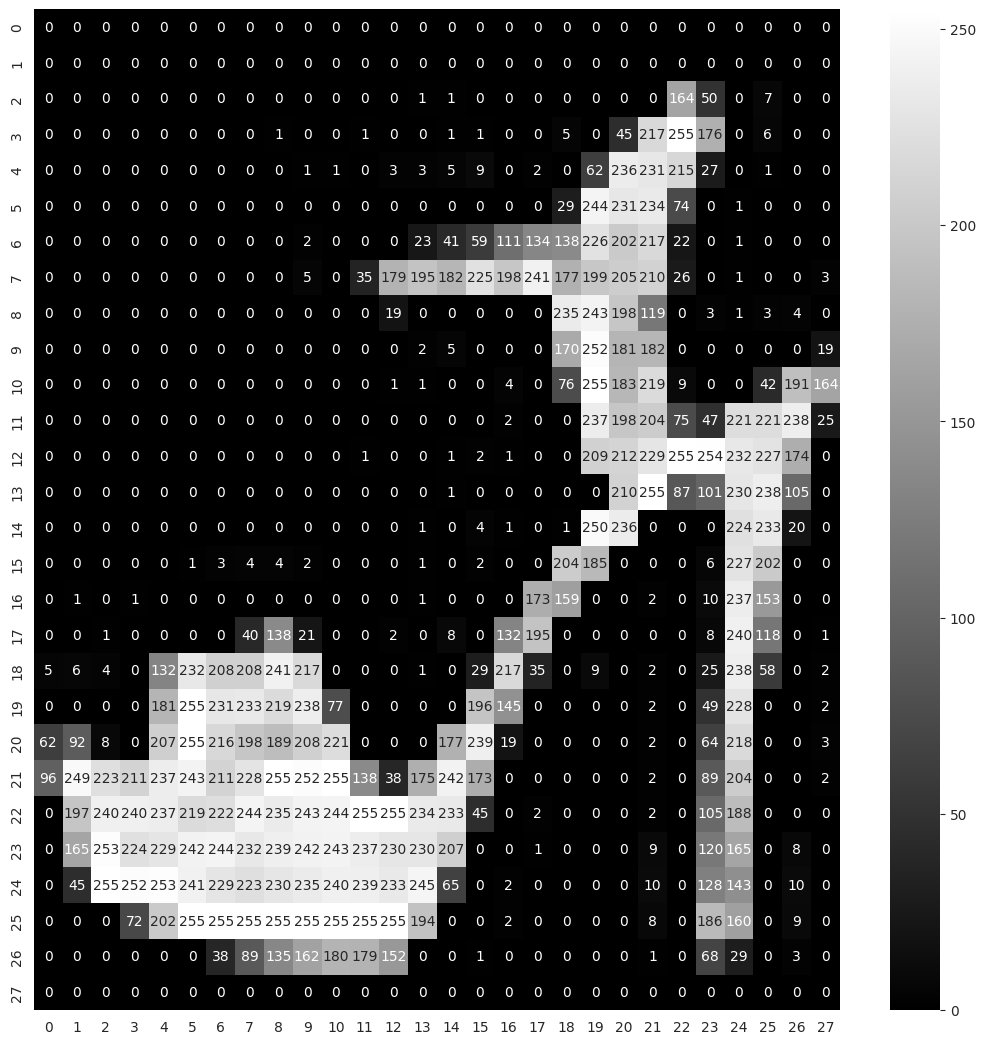

In [9]:
plt.figure(figsize=(13, 13))
sns.heatmap(x_train[9], annot=True, cmap="gray", fmt=".3g")

In [10]:
x_train[9]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0, 164,  50,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,
          0,   1,   1,   0,   0,   5,   0,  45, 217, 255, 176,   0,   6,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   3,
          3,   5,   9,   0,   2,   0,  62, 236, 231, 215,  27,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  29, 244, 231, 234,  74,   0,   1,   0,
          0,   0],
       [  

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
y_train[9]

5

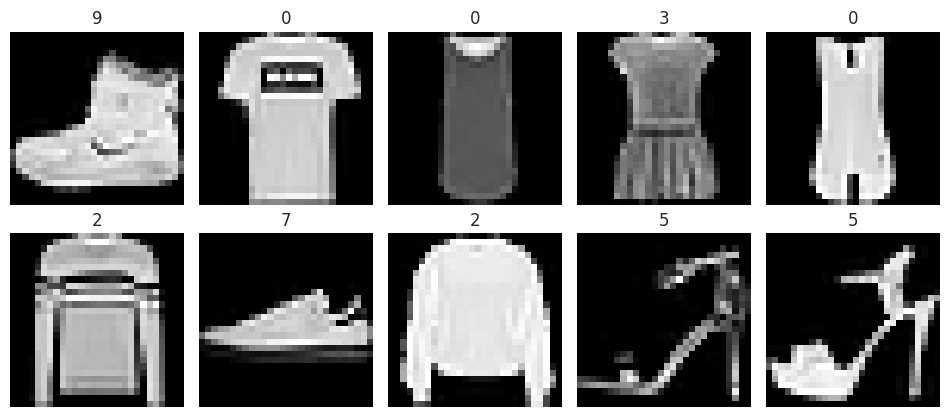

In [13]:
num_rows, num_cols = 2, 5
f, ax = plt.subplots(2, 5, figsize=(12,5),
                     gridspec_kw={'wspace':0.09, 'hspace':0.1}, 
                     squeeze=True)

for r in range(num_rows):
    for c in range(num_cols):
      
        image_index = r * 5 + c
        ax[r,c].axis("off")
        ax[r,c].set_title( y_train[image_index])
        ax[r,c].imshow( x_train[image_index], cmap='gray')
       
        
plt.tight_layout()
plt.show()
plt.close()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [14]:
x_train[9].min()

0

In [15]:
x_train[9].max()

255

In [16]:
# Normalize image pixels
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 
x_test /= 255

# We're actually making a MinMaxScaler here.

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [17]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [18]:
x_train = x_train.reshape(x_train.shape[0],28, 28, 1) 
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [19]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [20]:
from tensorflow.keras.utils import to_categorical

In [21]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_train.shape

(60000, 10)

In [22]:
y_train[9]

5

In [23]:
Y_train[9]

# Note that we will use this Y_train in the fit phase.

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [25]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu')) # stride = 1, padding = valid 

                

model.add(MaxPool2D(pool_size=(2, 2))) # stride = pool size, padding = valid

model.add(Flatten()) 

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop = EarlyStopping(monitor='val_accuracy',mode="max", patience=4, restore_best_weights = True)

In [29]:
model.fit(x_train, Y_train, batch_size=32, epochs=20, validation_data=(x_test,Y_test),callbacks=[early_stop]) 

Epoch 1/20
1875/1875 [==============================] - 20s 7ms/step - loss: 0.3895 - accuracy: 0.8606 - val_loss: 0.3211 - val_accuracy: 0.8851
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2622 - accuracy: 0.9048 - val_loss: 0.2890 - val_accuracy: 0.8952
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2179 - accuracy: 0.9198 - val_loss: 0.2717 - val_accuracy: 0.9033
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1859 - accuracy: 0.9315 - val_loss: 0.2663 - val_accuracy: 0.9038
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1604 - accuracy: 0.9406 - val_loss: 0.2622 - val_accuracy: 0.9094
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1364 - accuracy: 0.9499 - val_loss: 0.2725 - val_accuracy: 0.9084
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1162 - accuracy: 0.9573 - val_loss: 0.2759 - val_accuracy

In [30]:
x_train.shape

(60000, 28, 28, 1)

In [31]:
Y_train.shape

(60000, 10)

In [32]:
model.metrics_names

['loss', 'accuracy']

In [33]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.389,0.861,0.321,0.885
1,0.262,0.905,0.289,0.895
2,0.218,0.920,0.272,0.903
3,0.186,0.931,0.266,0.904
4,0.160,0.941,0.262,0.909


**TASK 7: Plot values of metrics you used in your model.**

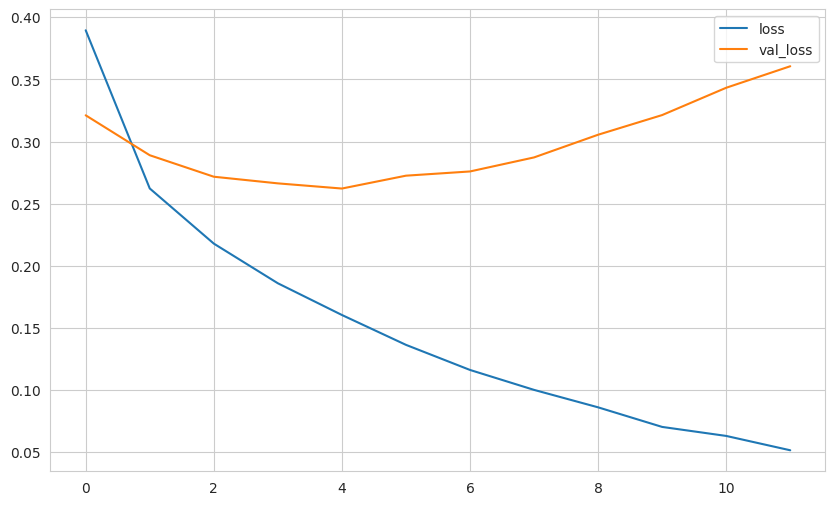

In [34]:
summary[["loss", "val_loss"]].plot();

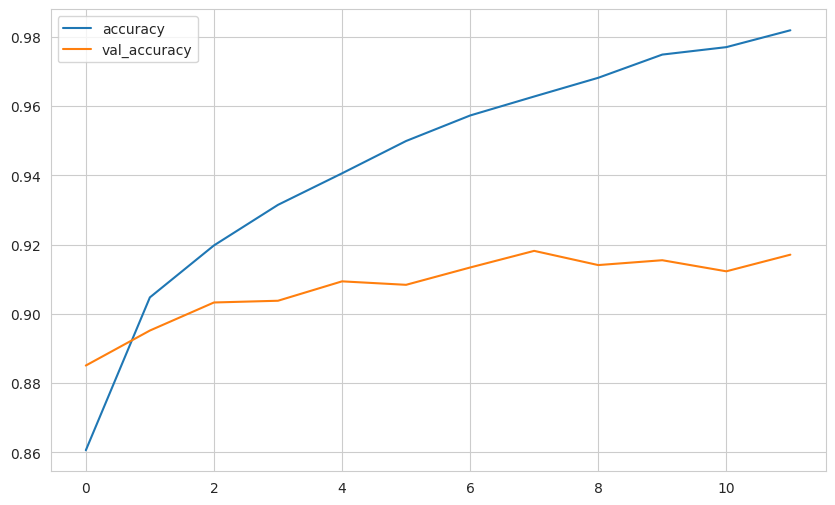

In [35]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [36]:
from sklearn.metrics import classification_report, confusion_matrix,multilabel_confusion_matrix

In [37]:
model.evaluate(x_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2872 - accuracy: 0.9182


[0.2871950566768646, 0.9182000160217285]

In [38]:
score = model.evaluate(x_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2871950566768646
Test accuracy: 0.9182000160217285


In [39]:
pred_prob = model.predict(x_test)
pred_prob

313/313 [==============================] - 1s 2ms/step


array([[0.00000043, 0.        , 0.00000009, ..., 0.00007662, 0.00000001,
        0.99991643],
       [0.0000001 , 0.        , 0.99999714, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99999416,
        0.        ],
       [0.        , 0.9999995 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00011773, 0.00000013, 0.00003592, ..., 0.00346449, 0.00008709,
        0.00005986]], dtype=float32)

In [40]:
pred_prob.shape

(10000, 10)

In [41]:
pred_prob[0]


array([0.00000043, 0.        , 0.00000009, 0.        , 0.00000002,
       0.00000633, 0.00000006, 0.00007662, 0.00000001, 0.99991643],
      dtype=float32)

In [42]:
np.argmax(pred_prob[0])


9

In [43]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred


array([9, 2, 1, ..., 8, 1, 5])

In [44]:
y_pred.shape

(10000,)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1000
           1       1.00      0.97      0.99      1000
           2       0.88      0.86      0.87      1000
           3       0.93      0.91      0.92      1000
           4       0.85      0.89      0.87      1000
           5       0.97      0.99      0.98      1000
           6       0.74      0.81      0.77      1000
           7       0.98      0.95      0.97      1000
           8       0.99      0.98      0.98      1000
           9       0.96      0.98      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [46]:
print(confusion_matrix(y_test, y_pred))

[[853   0  12  14   4   2 111   0   4   0]
 [  0 971   2  15   6   0   4   0   2   0]
 [ 10   0 861   6  48   0  75   0   0   0]
 [  9   0   8 912  36   0  34   0   1   0]
 [  0   0  55  11 887   0  47   0   0   0]
 [  0   0   0   0   1 988   0   3   0   8]
 [ 73   0  40  21  57   0 805   0   4   0]
 [  0   0   0   0   0  18   0 953   1  28]
 [  4   0   2   3   3   3   7   2 976   0]
 [  1   0   0   0   1   5   0  17   0 976]]


<Axes: >

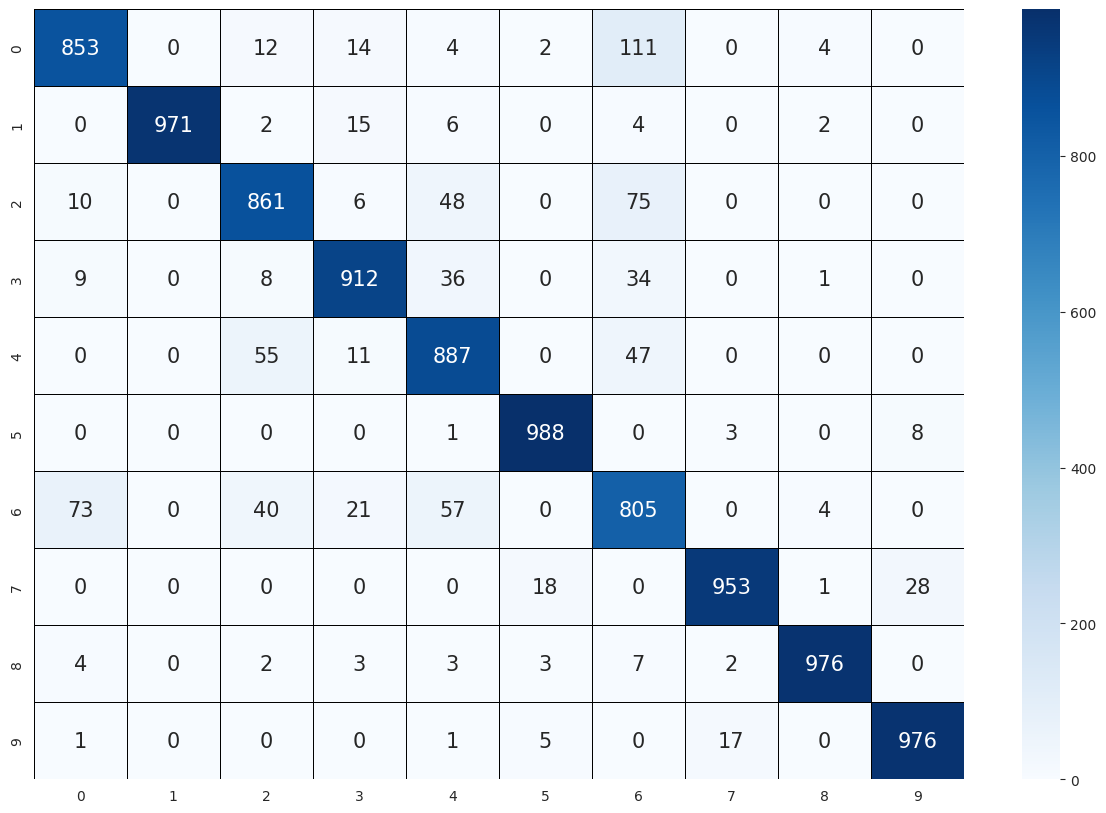

In [47]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15})

In [48]:
# y_test != y_pred
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [49]:
np.equal(y_test, y_pred).sum()  # total number of correct guesses.

9182

## Prediction

In [50]:
my_number = x_test[4]

In [51]:
my_number.shape

(28, 28, 1)

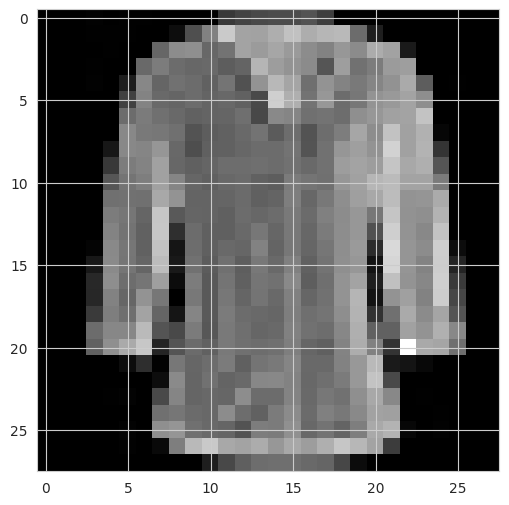

In [52]:
plt.imshow(my_number, cmap="gray")
plt.show()

In [53]:
pred_prob = model.predict(my_number.reshape(1,28,28,1)) 
pred_prob

1/1 [==============================] - 0s 59ms/step


array([[0.0625058 , 0.        , 0.00429272, 0.0000801 , 0.00219957,
        0.00000001, 0.9309215 , 0.00000001, 0.        , 0.00000023]],
      dtype=float32)

In [54]:
y_pred = np.argmax(pred_prob)
y_pred

6

In [55]:
model.save("cnn-1.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___